In [47]:
import numpy as np
import vtk
import networkx as nx
import matplotlib as mpl
import matplotlib.pyplot as plt

from mcopt.util.io import load_complex
from mcopt.morse_complex import MorseComplex
from mcopt.morse_graph import MorseGraph, color_from_coupling
from mcopt.optimal_transport import optimal_transport


%reload_ext autoreload
%autoreload 2

# Load Morse Complex

In [48]:
mc = load_complex('../data/sinusoidal')
mc_noisy = load_complex('../data/sinusoidal_noisy')

# Construct Morse Graph

In [49]:
mg = MorseGraph.from_complex(mc).simplify(4, mode='geo_dist')

mg_noisy = MorseGraph.from_complex(mc_noisy).simplify(4, mode='geo_dist')

## Initial Graphs

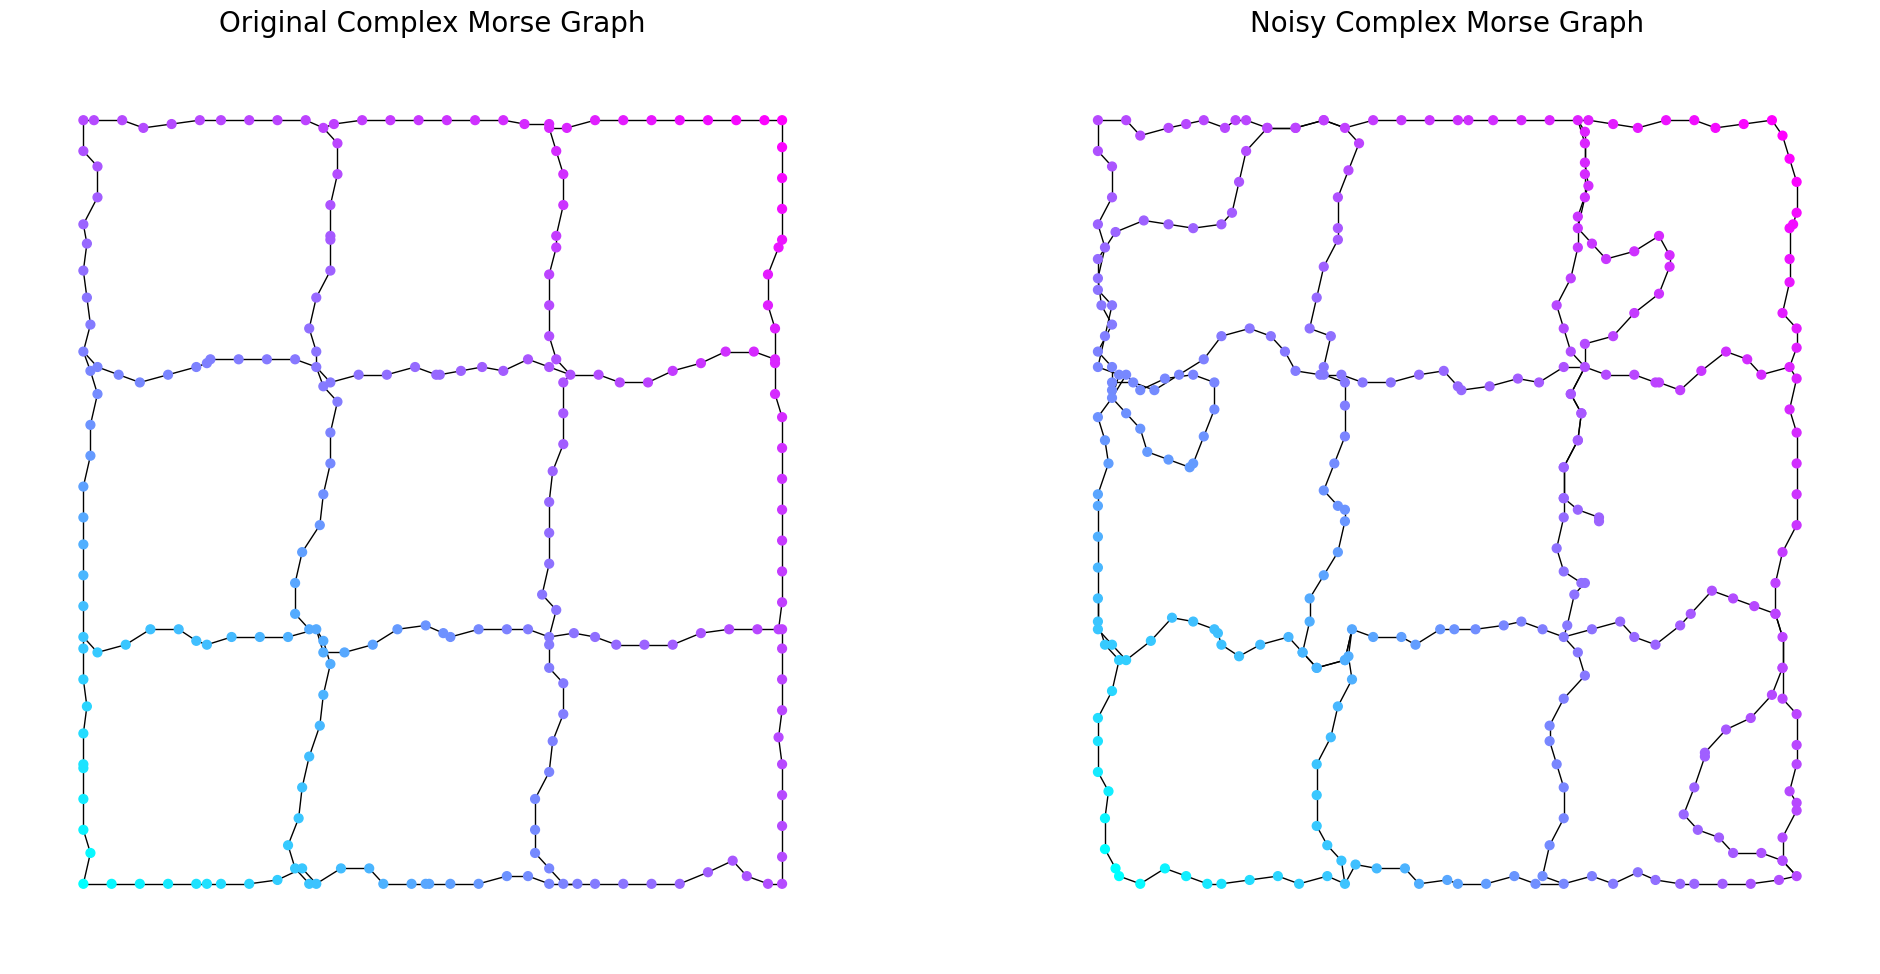

In [50]:
fig, axis = plt.subplots(1, 2, figsize=(24, 12))
cmap = 'cool'

mg.draw(ax=axis[0], node_size=40, cmap=cmap)
axis[0].set_title('Original Complex Morse Graph', fontsize=20)

mg_noisy.draw(ax=axis[1], node_size=40, cmap=cmap)
axis[1].set_title('Noisy Complex Morse Graph', fontsize=20)

plt.show()

# Run Optimal Transport

In [51]:
coupling, coupling_map = optimal_transport(mg.to_measure_network(), mg_noisy.to_measure_network())

# Generate Color Transfer

In [55]:
coupling.shape

(235, 323)

In [56]:
mg.number_of_nodes()

235

In [57]:
mg_noisy.number_of_nodes()

323

In [58]:
mg_node_color, mg_noisy_node_color = color_from_coupling(mg, mg_noisy, coupling)

fig, axis = plt.subplots(1, 2, figsize=(24, 12))
cmap = 'cool'

mg.draw(ax=axis[0], node_size=40, node_color=mg_node_color, cmap=cmap)
axis[0].set_title('Original Complex Morse Graph', fontsize=20)

mg_noisy.draw(ax=axis[1], node_size=40, node_color=mg_noisy_node_color, cmap=cmap)
axis[1].set_title('Noisy Complex Morse Graph', fontsize=20)

plt.show()